# Preliminary Vehicle Design Analysis
- Simulation for Top Speed Test - Want to achieve the maximum top speed within the 3m testing zone.
    - Simulation and optimization to find the gear ratio that maximizes the top speed of the vehicle through the 3m testing zone. The motor torque is also simulated to ensure that the motor stays within its operating capabilities.
- Simulation for Hill Climb Test - Want to achieve the maximum angle up the ramp.
    - Simulation and optimization to find the gear ratio that maximizes the output torque from the wheels. The maximum achievable angle is simulated using the results from the torque simulation.
- For both the Top Speed and Hill Climb Test simulations, multiple masses are tested to and analyzed to find the total vehicle mass that optimizes its performance in both tests.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
# Vehicle Parameters
m_0 = 15 # kg
wheel_D = 0.125 # m
m_wheel = 0.5 #kg
mu_s = 1.3 # []
g = 9.81 #m/s^2
T_warn = 2 # Nm, stall warning torque from torque speed curve.

# Find the slope of the torque speed curve
y0 = 2 # Nm
y1 = 0 # Nm
x0 = 45*(2*np.pi/60) # rad/s
x1 = 200*(2*np.pi/60) # rad/s

Tw_slope = (y1-y0)/(x1-x0) # Nm/rad/s
print(Tw_slope)



-0.12321673013566091


# Speed Test Analysis

In [3]:
# Speed Test parameters
L = 3 # m
F_resist = 10 # N
m_add = 3.75 # kg
F_resist_add = 5 # N
num_m_add = [0, 1, 2, 3, 4]
mG = np.linspace(0.1, 5, 1000) # set up list of gear ratios to test

T0 = 2 # Nm 
w0 = 0 # rad/s
v0 = 0 # m/s
t0 = 0 # s
dt = 0.01 # s
pos0 = 0 # m
rear_weight_dist = 0.4

N = 10000 # number of iterations

# SET UP ARRAYS FOR TORQUE, ANGULAR VELOCITY, LINEAR VELOCITY, AND POSITION
T_1 = np.zeros([len(mG), N])
w_1 = np.zeros([len(mG), N])
v_1 = np.zeros([len(mG), N])
pos_1 = np.zeros([len(mG), N])

T_2 = np.zeros([len(mG), N])
w_2 = np.zeros([len(mG), N])
v_2 = np.zeros([len(mG), N])
pos_2 = np.zeros([len(mG), N])

T_3 = np.zeros([len(mG), N])
w_3 = np.zeros([len(mG), N])
v_3 = np.zeros([len(mG), N])
pos_3 = np.zeros([len(mG), N])

T_4 = np.zeros([len(mG), N])
w_4 = np.zeros([len(mG), N])
v_4 = np.zeros([len(mG), N])
pos_4 = np.zeros([len(mG), N])

T_5 = np.zeros([len(mG), N])
w_5 = np.zeros([len(mG), N])
v_5 = np.zeros([len(mG), N])
pos_5 = np.zeros([len(mG), N])

No added mass:
Max velocity at end of acceleration zone = 0.799 m/s,at a gear ratio of 0.654
Torque = 0.969 Nm
3.75 kg added: 
Max velocity at end of acceleration zone = 0.541 m/s, at a gear ratio of 0.939
Torque = 0.999 Nm
7.50 kg added: 
Max velocity at end of acceleration zone = 0.406 m/s, at a gear ratio of 1.248
Torque = 1.002 Nm
11.25 kg added: 
Max velocity at end of acceleration zone = 0.325 m/s, at a gear ratio of 1.562
Torque = 1.001 Nm
15.00 kg added: 
Max velocity at end of acceleration zone = 0.271 m/s, at a gear ratio of 1.876
Torque = 1.000 Nm


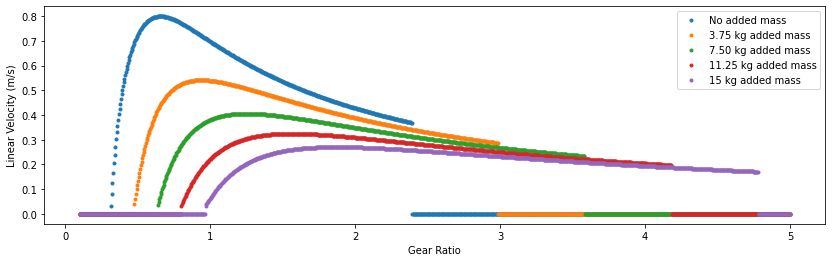

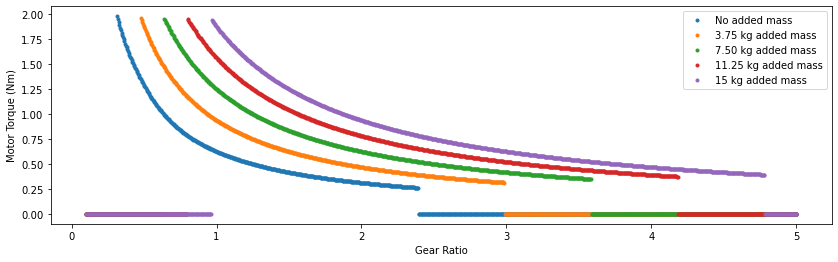

In [4]:
# Speed test simulation

# No added Mass
m_added = num_m_add[0]*m_add # total mass added
m_tot = m_0 + m_added # total vehicle mass
T_max = (rear_weight_dist*m_tot)*g*mu_s*(wheel_D/4) # max torque calculation
for i in range(len(mG)):
    gear_ratio = mG[i] # set the current gear ratio
    # set all parameter values to initial conditions
    T = T0
    w = w0
    v = v0
    t = t0
    pos = pos0
    for j in range(N):
        # set the values at the beginning of the time step
        T_1[i][j] = T
        w_1[i][j] = w
        v_1[i][j] = v
        pos_1[i][j] = pos

        # calculate the torque per wheel for the time step
        T_wheel = T*gear_ratio
        T_per_wheel = (1/2)*T_wheel

        # check that the wheel torque is not greater than the max wheel torque
        if (T_per_wheel >= T_max):
            break;

        # check that the motor torque does not reach the stall warning torque from the torque speed curve
        if (T > T_warn):
            w = 0 # set the angular velocity = 0 (stall)
            break;

        # calculate the kinematic values for the time step
        a = (T_wheel/(wheel_D/2) - F_resist - num_m_add[0]*F_resist_add)/m_tot # acceleration m/s^2
        v = v + a*dt # current velocity
        pos = pos + v*dt # current position
        w = v/(wheel_D/2) # current angular velocity
        t += dt # increment the current time

        # calculate new torque value
        T_last = T # save the torque value from the previous step
        T = T0 + Tw_slope*(w*gear_ratio) # find the current torque based on the slope of the torque-speed curve
        # ensure that the torque isn't negative
        if T < 0:
            T = 0;

# sotre only the torque and velocity values after the acceleration zone
v_1_zone = np.zeros(len(mG))
T_1_zone = np.zeros(len(mG))
for i in range(len(mG)):
    for j in range(N):
        if pos_1[i][j] > 3:
            v_1_zone[i] = v_1[i][j] # store the velocity at the end of the 3 m acceleration zone
            T_1_zone[i] = T_1[i][j] # store the torque at the end of the 3 m acceleration zone
            break;

v_1_zone_max = max(v_1_zone) # find the maximum velcity at the end of the acceleration zone
mG_1_max = float(mG[v_1_zone == v_1_zone_max]) # find the gear ratio at which the max velcity occurs.

print("No added mass:")
print("Max velocity at end of acceleration zone = {:.3f} m/s,at a gear ratio of {:.3f}".format(v_1_zone_max, mG_1_max))

T_1_zone_max = float(T_1_zone[v_1_zone == v_1_zone_max]) # find the motor torque for the max velocity gear ratio 
print("Torque = {:.3f} Nm".format(T_1_zone_max))


# 1 added mass
m_added = num_m_add[1]*m_add
m_tot = m_0 + m_added
T_max = (rear_weight_dist*m_tot)*g*mu_s*(wheel_D/4)
for i in range(len(mG)):
    gear_ratio = mG[i] # set the gear ratio
    # set all values to initial conditions
    T = T0
    w = w0
    v = v0
    t = t0
    pos = pos0
    for j in range(N):
        # set the values at the beginning of the time step
        T_2[i][j] = T
        w_2[i][j] = w
        v_2[i][j] = v
        pos_2[i][j] = pos

        # calculate the torque per wheel for the time step
        T_wheel = T*gear_ratio
        T_per_wheel = (1/2)*T_wheel

        # check that the wheel torque is not greater than the max wheel torque
        if (T_per_wheel >= T_max):
            break;

        # check that the motor torque does not reach the stall warning torque from the torque speed curve
        if (T > T_warn):
            w = 0 # set the angular velocity = 0 (stall)
            break;

        # calculate the kinematic values for the time step
        a = (T_wheel/(wheel_D/2) - F_resist - num_m_add[1]*F_resist_add)/m_tot
        v = v + a*dt
        pos = pos + v*dt
        w = v/(wheel_D/2)
        t += dt

        # calculate new torque value
        T_last = T # save the torque value from the previous step
        T = T0 + Tw_slope*(w*gear_ratio)
        # ensure that the torque isn't negative
        if T < 0:
            T = 0;

# take only the velocity values after the acceleration zone
v_2_zone = np.zeros(len(mG))
T_2_zone = np.zeros(len(mG))
for i in range(len(mG)):
    for j in range(N):
        if pos_2[i][j] > 3:
            v_2_zone[i] = v_2[i][j]
            T_2_zone[i] = T_2[i][j]
            break;

v_2_zone_max = max(v_2_zone)
mG_2_max = float(mG[v_2_zone == v_2_zone_max])

print("{:.2f} kg added: ".format(m_added))
print("Max velocity at end of acceleration zone = {:.3f} m/s, at a gear ratio of {:.3f}".format(v_2_zone_max, mG_2_max))

T_2_zone_max = float(T_2_zone[v_2_zone == v_2_zone_max])
print("Torque = {:.3f} Nm".format(T_2_zone_max))


# 2 added masses
m_added = num_m_add[2]*m_add
m_tot = m_0 + m_added
T_max = (rear_weight_dist*m_tot)*g*mu_s*(wheel_D/4)
for i in range(len(mG)):
    gear_ratio = mG[i] # set the gear ratio
    # set all values to initial conditions
    T = T0
    w = w0
    v = v0
    t = t0
    pos = pos0
    for j in range(N):
        # set the values at the beginning of the time step
        T_3[i][j] = T
        w_3[i][j] = w
        v_3[i][j] = v
        pos_3[i][j] = pos

        # calculate the torque per wheel for the time step
        T_wheel = T*gear_ratio
        T_per_wheel = (1/2)*T_wheel

        # check that the wheel torque is not greater than the max wheel torque
        if (T_per_wheel >= T_max):
            break;

        # check that the motor torque does not reach the stall warning torque from the torque speed curve
        if (T > T_warn):
            w = 0 # set the angular velocity = 0 (stall)
            break;

        # calculate the kinematic values for the time step
        a = (T_wheel/(wheel_D/2) - F_resist - num_m_add[2]*F_resist_add)/m_tot
        v = v + a*dt
        pos = pos + v*dt
        w = v/(wheel_D/2)
        t += dt

        # calculate new torque value
        T_last = T # save the torque value from the previous step
        T = T0 + Tw_slope*(w*gear_ratio)
        # ensure that the torque isn't negative
        if T < 0:
            T = 0;

# take only the velocity values after the acceleration zone
v_3_zone = np.zeros(len(mG))
T_3_zone = np.zeros(len(mG))
for i in range(len(mG)):
    for j in range(N):
        if pos_3[i][j] > 3:
            v_3_zone[i] = v_3[i][j]
            T_3_zone[i] = T_3[i][j]
            break;

v_3_zone_max = max(v_3_zone)
mG_3_max = float(mG[v_3_zone == v_3_zone_max])

print("{:.2f} kg added: ".format(m_added))
print("Max velocity at end of acceleration zone = {:.3f} m/s, at a gear ratio of {:.3f}".format(v_3_zone_max, mG_3_max))

T_3_zone_max = float(T_3_zone[v_3_zone == v_3_zone_max])
print("Torque = {:.3f} Nm".format(T_3_zone_max))


# 3 added masses
m_added = num_m_add[3]*m_add
m_tot = m_0 + m_added
T_max = (rear_weight_dist*m_tot)*g*mu_s*(wheel_D/4)
for i in range(len(mG)):
    gear_ratio = mG[i] # set the gear ratio
    # set all values to initial conditions
    T = T0
    w = w0
    v = v0
    t = t0
    pos = pos0
    for j in range(N):
        # set the values at the beginning of the time step
        T_4[i][j] = T
        w_4[i][j] = w
        v_4[i][j] = v
        pos_4[i][j] = pos

        # calculate the torque per wheel for the time step
        T_wheel = T*gear_ratio
        T_per_wheel = (1/2)*T_wheel

        # check that the wheel torque is not greater than the max wheel torque
        if (T_per_wheel >= T_max):
            break;

        # check that the motor torque does not reach the stall warning torque from the torque speed curve
        if (T > T_warn):
            w = 0 # set the angular velocity = 0 (stall)
            break;

        # calculate the kinematic values for the time step
        a = (T_wheel/(wheel_D/2) - F_resist - num_m_add[3]*F_resist_add)/m_tot
        v = v + a*dt
        pos = pos + v*dt
        w = v/(wheel_D/2)
        t += dt

        # calculate new torque value
        T_last = T # save the torque value from the previous step
        T = T0 + Tw_slope*(w*gear_ratio)
        # ensure that the torque isn't negative
        if T < 0:
            T = 0;

# take only the velocity values after the acceleration zone
v_4_zone = np.zeros(len(mG))
T_4_zone = np.zeros(len(mG))
for i in range(len(mG)):
    for j in range(N):
        if pos_4[i][j] > 3:
            v_4_zone[i] = v_4[i][j]
            T_4_zone[i] = T_4[i][j]
            break;

v_4_zone_max = max(v_4_zone)
mG_4_max = float(mG[v_4_zone == v_4_zone_max])

print("{:.2f} kg added: ".format(m_added))
print("Max velocity at end of acceleration zone = {:.3f} m/s, at a gear ratio of {:.3f}".format(v_4_zone_max, mG_4_max))

T_4_zone_max = float(T_4_zone[v_4_zone == v_4_zone_max])
print("Torque = {:.3f} Nm".format(T_4_zone_max))


# 4 added masses
m_added = num_m_add[4]*m_add
m_tot = m_0 + m_added
T_max = (rear_weight_dist*m_tot)*g*mu_s*(wheel_D/4)
for i in range(len(mG)):
    gear_ratio = mG[i] # set the gear ratio
    # set all values to initial conditions
    T = T0
    w = w0
    v = v0
    t = t0
    pos = pos0
    for j in range(N):
        # set the values at the beginning of the time step
        T_5[i][j] = T
        w_5[i][j] = w
        v_5[i][j] = v
        pos_5[i][j] = pos

        # calculate the torque per wheel for the time step
        T_wheel = T*gear_ratio
        T_per_wheel = (1/2)*T_wheel

        # check that the wheel torque is not greater than the max wheel torque
        if (T_per_wheel >= T_max):
            break;

        # check that the motor torque does not reach the stall warning torque from the torque speed curve
        if (T > T_warn):
            w = 0 # set the angular velocity = 0 (stall)
            break;

        # calculate the kinematic values for the time step
        a = (T_wheel/(wheel_D/2) - F_resist - num_m_add[4]*F_resist_add)/m_tot
        v = v + a*dt
        pos = pos + v*dt
        w = v/(wheel_D/2)
        t += dt

        # calculate new torque value
        T_last = T # save the torque value from the previous step
        T = T0 + Tw_slope*(w*gear_ratio)
        # ensure that the torque isn't negative
        if T < 0:
            T = 0;

# take only the velocity values after the acceleration zone
v_5_zone = np.zeros(len(mG))
T_5_zone = np.zeros(len(mG))
for i in range(len(mG)):
    for j in range(N):
        if pos_5[i][j] > 3:
            v_5_zone[i] = v_5[i][j]
            T_5_zone[i] = T_5[i][j]
            break;

v_5_zone_max = max(v_5_zone)
mG_5_max = float(mG[v_5_zone == v_5_zone_max])

print("{:.2f} kg added: ".format(m_added))
print("Max velocity at end of acceleration zone = {:.3f} m/s, at a gear ratio of {:.3f}".format(v_5_zone_max, mG_5_max))

T_5_zone_max = float(T_5_zone[v_5_zone == v_5_zone_max])
print("Torque = {:.3f} Nm".format(T_5_zone_max))



# PLOT THE RESULTS
plt.figure(figsize=(14,4))
plt.plot(mG, v_1_zone, '.', label='No added mass')
plt.plot(mG, v_2_zone, '.', label='3.75 kg added mass')
plt.plot(mG, v_3_zone, '.', label='7.50 kg added mass')
plt.plot(mG, v_4_zone, '.', label='11.25 kg added mass')
plt.plot(mG, v_5_zone, '.', label='15 kg added mass')
plt.xlabel('Gear Ratio')
plt.ylabel('Linear Velocity (m/s)')
plt.legend()

plt.figure(figsize=(14,4))
plt.plot(mG, T_1_zone, '.', label='No added mass')
plt.plot(mG, T_2_zone, '.', label='3.75 kg added mass')
plt.plot(mG, T_3_zone, '.', label='7.50 kg added mass')
plt.plot(mG, T_4_zone, '.', label='11.25 kg added mass')
plt.plot(mG, T_5_zone, '.', label='15 kg added mass')
plt.xlabel('Gear Ratio')
plt.ylabel('Motor Torque (Nm)')
plt.legend()



In [10]:
# Finding values corresponding to the chosen gear ratio for the speed test simulation

ind_n = mG >= (1/1.88)
v_1_needed = v_1_zone[ind_n]
v_end = v_1_needed[0]
print(v_end)
for k in range(N):
    if (v_1[ind_n,k][0] == v_end):
        T_mot_op = T_1[ind_n, k][0]
        print(k)
        break;
for l in range(N):
    if pos_1[ind_n, l][0] >= 6:
        print(l)
        print('Speed at end of 6 m:', v_1[ind_n, l][0])
        break;

t = (l-k)*dt
print(t)

print(T_mot_op)

w_mot_op = (T_mot_op - y0)/Tw_slope + x0
print(w_mot_op*(60/(2*np.pi)))

power = T_mot_op*w_mot_op
print('Power: {:.3f} W'.format(power))
print('Horsepower: {:.3f} HP'.format(power/746))

0.7594112939981915
538
924
Speed at end of 6 m: 0.7866265251433545
3.86
1.196721736290565
107.25406543748122
Power: 13.441 W
Horsepower: 0.018 HP


# Hill Climb Analysis

In [6]:
# Hill Climb Test Parameters
r = 1.05 # m
m_add = 3.75 # kg
max_angle = (45)*(2*np.pi/180) # rad
array_angles = np.linspace(0, max_angle, 1000) # array of angles for zero to 45 degrees in radians

T_req = 1.80; # Required torque

mG_H = np.linspace(0.1, 10, 1000) # set up list of gear ratios to test

# SET UP THE ARRAYS TO STORE THE ACCELERATIONS AND TORQUES FOR THE VARIOUS SIMULATIONS
acc1 = np.zeros([len(mG_H), len(array_angles)])
acc2 = np.zeros([len(mG_H), len(array_angles)])
acc3 = np.zeros([len(mG_H), len(array_angles)])
acc4 = np.zeros([len(mG_H), len(array_angles)])
acc5 = np.zeros([len(mG_H), len(array_angles)])

Tor1 = np.zeros([len(mG_H), len(array_angles)])
Tor2 = np.zeros([len(mG_H), len(array_angles)])
Tor3 = np.zeros([len(mG_H), len(array_angles)])
Tor4 = np.zeros([len(mG_H), len(array_angles)])
Tor5 = np.zeros([len(mG_H), len(array_angles)])

Number of added masses: 0
Max Angle Reached: 27.387 degrees
Torque Required: 2.115 Nm
Required Gear Ratio: 2.350

Number of added masses: 1
Max Angle Reached: 32.793 degrees
Torque Required: 3.265 Nm
Required Gear Ratio: 3.628

Number of added masses: 2
Max Angle Reached: 35.946 degrees
Torque Required: 4.353 Nm
Required Gear Ratio: 4.837

Number of added masses: 3
Max Angle Reached: 37.928 degrees
Torque Required: 5.406 Nm
Required Gear Ratio: 6.006

Number of added masses: 4
Max Angle Reached: 39.459 degrees
Torque Required: 0.000 Nm
Required Gear Ratio: 7.186



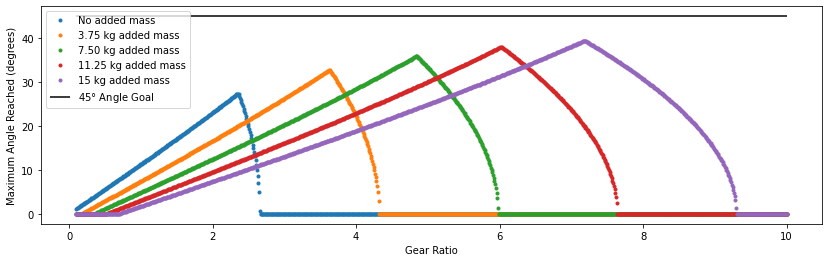

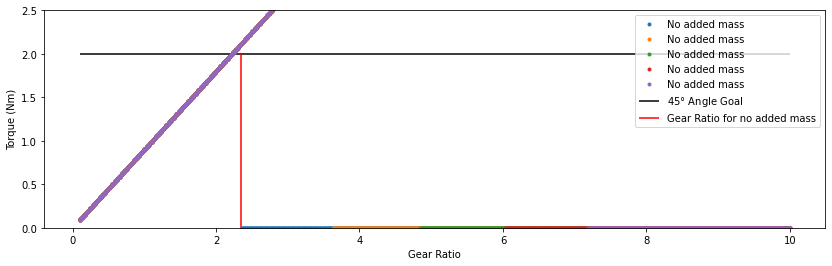

In [7]:
# Hill Climb Analysis

# Finding the torque and acceleration for the entire 45 degree climb

# No added mass
masses_added = 0 # number of added masses
m_total = m_0 + masses_added*m_add # total mass including the base vehicle mass and added mass
for i in range(len(mG_H)):
    for j in range(len(array_angles)):
        maxT = (rear_weight_dist*m_0 + masses_added*m_add)*np.cos(array_angles[j])*g*mu_s*(wheel_D/4) # maximum torque
        T1wheel = (mG_H[i]*T_req)/2 # torque per driven wheel
        if T1wheel > maxT: # make sure the wheel torque isn't greater than the maximum torque
            T1wheel = 0
            break;
        Tor1[i][j] = T1wheel # store the current wheel torque
        # find the acceleration of the vehicle using Newton's second law.
        acc = ((2*T1wheel)/(wheel_D/2) - masses_added*F_resist_add - m_total*g*np.sin(array_angles[j]))/m_total
        acc1[i][j] = acc # store the accleration

# Find where the vehicle stops on the ramp by find where acceleration is less than or equal to zero
angle_stop1 = np.zeros(len(mG_H)) # set up array for max angle for each gear ratio
Tor_stop1 = np.zeros(len(mG_H)) # set up array for torque at max angle for each gear ratio
for i in range(len(mG_H)):
    for j in range(len(array_angles)):
        if acc1[i][j] <= 0: # check if the acceleration is less than or equal to zero
            angle_stop1[i] = array_angles[j] # if the acceleration is less than or equal to zero, the vehicle stopped\
            Tor_stop1[i] = Tor1[i][j] # store torque at max angle
            break;


# 1 added mass
masses_added = 1
m_total = m_0 + masses_added*m_add
for i in range(len(mG_H)):
    for j in range(len(array_angles)):
        maxT = (rear_weight_dist*m_0 + masses_added*m_add)*np.cos(array_angles[j])*g*mu_s*(wheel_D/4)
        T1wheel = (mG_H[i]*T_req)/2 
        if T1wheel > maxT:
            T1wheel = 0
            break;
        Tor2[i][j] = T1wheel
        acc = ((2*T1wheel)/(wheel_D/2) - masses_added*F_resist_add - m_total*g*np.sin(array_angles[j]))/m_total
        acc2[i][j] = acc

# Find where the vehicle stops on the ramp by find where acceleration is less than or equal to zero
angle_stop2 = np.zeros(len(mG_H)) # set up array for max angle for each gear ratio
Tor_stop2 = np.zeros(len(mG_H)) # set up array for torque at max angle for each gear ratio
for i in range(len(mG_H)):
    for j in range(len(array_angles)):
        if acc2[i][j] <= 0: # check if the acceleration is less than or equal to zero
            angle_stop2[i] = array_angles[j] # if the acceleration is less than or equal to zero, the vehicle stopped
            Tor_stop2[i] = Tor2[i][j] # store torque for max angle
            break;   
        
        
# 2 added masses
masses_added = 2
m_total = m_0 + masses_added*m_add
for i in range(len(mG_H)):
    for j in range(len(array_angles)):
        maxT = (rear_weight_dist*m_0 + masses_added*m_add)*np.cos(array_angles[j])*g*mu_s*(wheel_D/4)
        T1wheel = (mG_H[i]*T_req)/2
        if T1wheel > maxT:
            T1wheel = 0
            break;
        Tor3[i][j] = T1wheel
        acc = ((2*T1wheel)/(wheel_D/2) - masses_added*F_resist_add - m_total*g*np.sin(array_angles[j]))/m_total
        acc3[i][j] = acc

# Find where the vehicle stops on the ramp by find where acceleration is less than or equal to zero
angle_stop3 = np.zeros(len(mG_H)) # set up array for max angle for each gear ratio
Tor_stop3 = np.zeros(len(mG_H)) # set up array for torque at max angle for each gear ratio
for i in range(len(mG_H)):
    for j in range(len(array_angles)):
        if acc3[i][j] <= 0: # check if the acceleration is less than or equal to zero
            angle_stop3[i] = array_angles[j] # if the acceleration is less than or equal to zero, the vehicle stopped
            Tor_stop3[i] = Tor3[i][j] # store torque for max angle
            break;      
        
        
# 3 added masses
masses_added = 3
m_total = m_0 + masses_added*m_add
for i in range(len(mG_H)):
    for j in range(len(array_angles)):
        maxT = (rear_weight_dist*m_0 + masses_added*m_add)*np.cos(array_angles[j])*g*mu_s*(wheel_D/4)
        T1wheel = (mG_H[i]*T_req)/2 
        if T1wheel > maxT:
            T1wheel = 0
            break;
        Tor4[i][j] = T1wheel
        acc = ((2*T1wheel)/(wheel_D/2) - masses_added*F_resist_add - m_total*g*np.sin(array_angles[j]))/m_total
        acc4[i][j] = acc

# Find where the vehicle stops on the ramp by find where acceleration is less than or equal to zero
angle_stop4 = np.zeros(len(mG_H)) # set up array for max angle for each gear ratio
Tor_stop4 = np.zeros(len(mG_H)) # set up array for torque at max angle for each gear ratio
for i in range(len(mG_H)):
    for j in range(len(array_angles)):
        if acc4[i][j] <= 0: # check if the acceleration is less than or equal to zero
            angle_stop4[i] = array_angles[j] # if the acceleration is less than or equal to zero, the vehicle stopped
            Tor_stop4[i] = Tor4[i][j] # store torque for max angle
            break;   
        
        
# 4 added masses
masses_added = 4 # number of added masses
m_total = m_0 + masses_added*m_add # find total mass
for i in range(len(mG_H)):
    for j in range(len(array_angles)):
        maxT = (rear_weight_dist*m_0 + masses_added*m_add)*np.cos(array_angles[j])*g*mu_s*(wheel_D/4) # Max Torque
        T1wheel = (mG_H[i]*T_req)/2 # torque per wheel
        if T1wheel > maxT:
            T1wheel = 0
            break;
        Tor5[i][j] = T1wheel
        acc = ((2*T1wheel)/(wheel_D/2) - masses_added*F_resist_add - m_total*g*np.sin(array_angles[j]))/m_total
        acc5[i][j] = acc

# Find where the vehicle stops on the ramp by find where acceleration is less than or equal to zero
angle_stop5 = np.zeros(len(mG_H)) # set up array for max angle for each gear ratio
Tor_stop5 = np.zeros(len(mG_H)) # set up array for torque at max angle for each gear ratio
for i in range(len(mG_H)):
    for j in range(len(array_angles)):
        if acc5[i][j] <= 0: # check if the acceleration is less than or equal to zero
            angle_stop5[i] = array_angles[j] # if the acceleration is less than or equal to zero, the vehicle stopped
            Tor_stop5[i] = Tor5[i][j] # store torque for max angle
            break;        
            

# PLOT THE RESULTS OF MAX ANGLE REACHED AND REQUIRED TORQUE VS GEAR RATIO
plt.figure(figsize=(14,4))
plt.plot(mG_H, angle_stop1*(180/np.pi), '.', label='No added mass')
plt.plot(mG_H, angle_stop2*(180/np.pi), '.', label='3.75 kg added mass')
plt.plot(mG_H, angle_stop3*(180/np.pi), '.', label='7.50 kg added mass')
plt.plot(mG_H, angle_stop4*(180/np.pi), '.', label='11.25 kg added mass')
plt.plot(mG_H, angle_stop5*(180/np.pi), '.', label='15 kg added mass')
plt.xlabel('Gear Ratio')
plt.ylabel('Maximum Angle Reached (degrees)')
plt.hlines(45, mG_H[0], mG_H[-1], 'k', label = '45$\degree$ Angle Goal')
plt.legend(loc='best')

plt.figure(figsize=(14,4))
plt.plot(mG_H, Tor_stop1, '.', label='No added mass')
plt.plot(mG_H, Tor_stop2, '.', label='No added mass')
plt.plot(mG_H, Tor_stop3, '.', label='No added mass')
plt.plot(mG_H, Tor_stop4, '.', label='No added mass')
plt.plot(mG_H, Tor_stop5, '.', label='No added mass')
plt.xlabel('Gear Ratio')
plt.ylabel('Torque (Nm)')
plt.hlines(2, mG_H[0], mG_H[-1], 'k', label = '45$\degree$ Angle Goal')
plt.vlines(mG_H[angle_stop1 == max(angle_stop1)][0], 0, 2, 'r', label='Gear Ratio for no added mass')
plt.legend(loc='best')
plt.ylim(0, 2.5)


# PRINT THE RESULTS FOR MAX ANGLE REACHED TORQUE REQUIRED, AND GEAR RATIO FOR EACH NUMBER OF ADDED MASSES
print('Number of added masses: {:d}'.format(0))
print('Max Angle Reached: {:.3f} degrees'.format(max(angle_stop1)*(180/np.pi)))
print('Torque Required: {:.3f} Nm'.format(float(Tor_stop1[angle_stop1 == max(angle_stop1)][0])))
print('Required Gear Ratio: {:.3f}'.format(float(mG_H[angle_stop1 == max(angle_stop1)][0])))
print()

print('Number of added masses: {:d}'.format(1))
print('Max Angle Reached: {:.3f} degrees'.format(max(angle_stop2)*(180/np.pi)))
print('Torque Required: {:.3f} Nm'.format(float(Tor_stop2[angle_stop2 == max(angle_stop2)][0])))
print('Required Gear Ratio: {:.3f}'.format(float(mG_H[angle_stop2 == max(angle_stop2)][0])))
print()

print('Number of added masses: {:d}'.format(2))
print('Max Angle Reached: {:.3f} degrees'.format(max(angle_stop3)*(180/np.pi)))
print('Torque Required: {:.3f} Nm'.format(float(Tor_stop3[angle_stop3 == max(angle_stop3)][0])))
print('Required Gear Ratio: {:.3f}'.format(float(mG_H[angle_stop3 == max(angle_stop3)][0])))
print()

print('Number of added masses: {:d}'.format(3))
print('Max Angle Reached: {:.3f} degrees'.format(max(angle_stop4)*(180/np.pi)))
print('Torque Required: {:.3f} Nm'.format(float(Tor_stop4[angle_stop4 == max(angle_stop4)][0])))
print('Required Gear Ratio: {:.3f}'.format(float(mG_H[angle_stop4 == max(angle_stop4)][0])))
print()

print('Number of added masses: {:d}'.format(4))
print('Max Angle Reached: {:.3f} degrees'.format(max(angle_stop5)*(180/np.pi)))
print('Torque Required: {:.3f} Nm'.format(float(Tor_stop5[angle_stop5 == max(angle_stop5)][0])))
print('Required Gear Ratio: {:.3f}'.format(float(mG_H[angle_stop5 == max(angle_stop5)][0])))
print()


In [9]:
# Finding the values corresponding to the chosen gear ratio for the hill climg event
ind_n = mG_H >= 2.2
angle_stop_needed = angle_stop1[ind_n][0]
print(angle_stop_needed*(180/np.pi))
height_achieved = r*np.sin(angle_stop_needed)
print(height_achieved)

motor_torque = Tor_stop1[angle_stop1 == angle_stop_needed]*2/2.2
print(motor_torque[0])

w_mot_op_H = (motor_torque[0] - y0)/Tw_slope + x0
print(w_mot_op_H*(60/(2*np.pi)))

power_H = motor_torque[0]*w_mot_op_H
print('Power: {:.3f} W'.format(power_H))
print('Horsepower: {:.3f} HP'.format(power_H/746))

25.585585585585584
0.45345179566396215
1.800737100737101
60.44287469287469
Power: 11.398 W
Horsepower: 0.015 HP
